In [2]:
import torch
import os
import matplotlib.pyplot as plt

In [11]:
artifact_number = 8000
artifacts_files = os.listdir("models")
model_file = f"models/{artifacts_files[artifact_number]}/{artifacts_files[artifact_number]}"

loaded_checkpoint = torch.load(model_file)
# in_channels = 3
# model = ImpalaModel(in_channels = observation_shape[0])
# policy = CategoricalPolicy(model, False, 15)
# if "state_dict" in loaded_checkpoint:
#     policy.load_state_dict(loaded_checkpoint['state_dict'])
# elif "model_state_dict" in loaded_checkpoint:
#     policy.load_state_dict(loaded_checkpoint['model_state_dict'])
# policy.to(device)
conv_layer = loaded_checkpoint['state_dict']['embedder.block1.conv.weight']
print(conv_layer.shape)

torch.Size([16, 3, 3, 3])


In [14]:
for layer in loaded_checkpoint['state_dict'].keys():
    print(layer)

embedder.block1.conv.weight
embedder.block1.conv.bias
embedder.block1.res1.conv1.weight
embedder.block1.res1.conv1.bias
embedder.block1.res1.conv2.weight
embedder.block1.res1.conv2.bias
embedder.block1.res2.conv1.weight
embedder.block1.res2.conv1.bias
embedder.block1.res2.conv2.weight
embedder.block1.res2.conv2.bias
embedder.block2.conv.weight
embedder.block2.conv.bias
embedder.block2.res1.conv1.weight
embedder.block2.res1.conv1.bias
embedder.block2.res1.conv2.weight
embedder.block2.res1.conv2.bias
embedder.block2.res2.conv1.weight
embedder.block2.res2.conv1.bias
embedder.block2.res2.conv2.weight
embedder.block2.res2.conv2.bias
embedder.block3.conv.weight
embedder.block3.conv.bias
embedder.block3.res1.conv1.weight
embedder.block3.res1.conv1.bias
embedder.block3.res1.conv2.weight
embedder.block3.res1.conv2.bias
embedder.block3.res2.conv1.weight
embedder.block3.res2.conv1.bias
embedder.block3.res2.conv2.weight
embedder.block3.res2.conv2.bias
embedder.fc.weight
embedder.fc.bias
fc_policy.

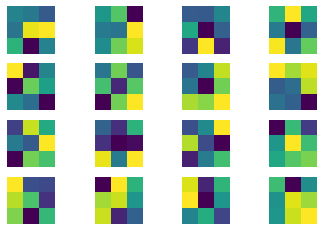

In [12]:
# loop through all 16 filters
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(conv_layer[i][0].cpu().detach().numpy())
    plt.axis('off')
plt.show()

In [16]:
import numpy as np

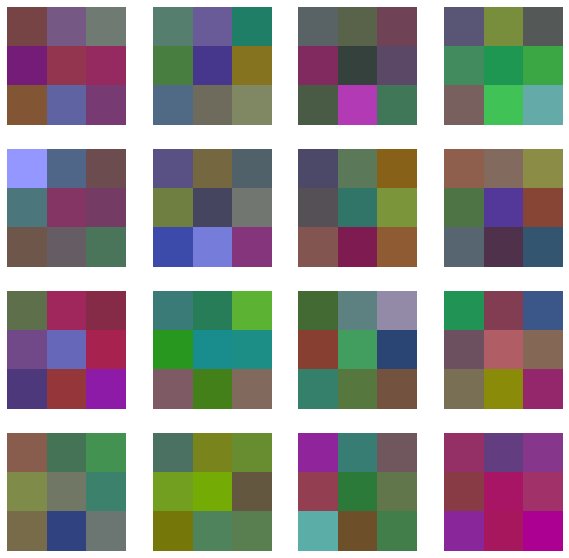

In [17]:
# Normalize the filters
min_val = torch.min(conv_layer)
range_val = torch.max(conv_layer) - min_val
normalized_filters = (conv_layer - min_val) / range_val

# Plot the filters
fig, axes = plt.subplots(4, 4, figsize=(10,10)) # Adjust the subplot grid as needed
for i, ax in enumerate(axes.flat):
    filter = normalized_filters[i].cpu().numpy()
    filter = np.transpose(filter, (1, 2, 0))  # Rearrange the dimensions to (H, W, C)
    ax.imshow(filter)
    ax.axis('off')
plt.show()

In [19]:
from tqdm import tqdm

In [20]:
for artifact_number in tqdm(range(8000)):
    artifacts_files = os.listdir("models")
    model_file = f"models/{artifacts_files[artifact_number]}/{artifacts_files[artifact_number]}"
    loaded_checkpoint = torch.load(model_file)
    conv_layer = loaded_checkpoint['state_dict']['embedder.block1.conv.weight']
    
    # Normalize the filters
    min_val = torch.min(conv_layer)
    range_val = torch.max(conv_layer) - min_val
    normalized_filters = (conv_layer - min_val) / range_val

    # Plot the filters
    fig, axes = plt.subplots(4, 4, figsize=(10,10)) # Adjust the subplot grid as needed
    for i, ax in enumerate(axes.flat):
        filter = normalized_filters[i].cpu().numpy()
        filter = np.transpose(filter, (1, 2, 0))  # Rearrange the dimensions to (H, W, C)
        ax.imshow(filter)
        ax.axis('off')
    os.makedirs("filters", exist_ok=True)
    plt.savefig(f"filters/{artifact_number}.png")
    plt.close()

100%|██████████| 8000/8000 [39:28<00:00,  3.38it/s]   


In [7]:
artifact_number = 6697
artifacts_files = os.listdir("models/model_133971968.pth")
print(artifacts_files)
model_file = f"models/{artifacts_files[artifact_number]}/{artifacts_files[artifact_number]}"
loaded_checkpoint = torch.load(model_file)
conv_layer = loaded_checkpoint['state_dict']['embedder.block1.conv.weight']


['model_133971968.pth']


IndexError: list index out of range

# More general visualization

In [1]:
param_names = [
    'embedder.block1.conv.weight', 'embedder.block1.conv.bias',
    'embedder.block1.res1.conv1.weight', 'embedder.block1.res1.conv1.bias',
    'embedder.block1.res1.conv2.weight', 'embedder.block1.res1.conv2.bias',
    'embedder.block1.res2.conv1.weight', 'embedder.block1.res2.conv1.bias',
    'embedder.block1.res2.conv2.weight', 'embedder.block1.res2.conv2.bias',
    'embedder.block2.conv.weight', 'embedder.block2.conv.bias',
    'embedder.block2.res1.conv1.weight', 'embedder.block2.res1.conv1.bias',
    'embedder.block2.res1.conv2.weight', 'embedder.block2.res1.conv2.bias',
    'embedder.block2.res2.conv1.weight', 'embedder.block2.res2.conv1.bias',
    'embedder.block2.res2.conv2.weight', 'embedder.block2.res2.conv2.bias',
    'embedder.block3.conv.weight', 'embedder.block3.conv.bias',
    'embedder.block3.res1.conv1.weight', 'embedder.block3.res1.conv1.bias',
    'embedder.block3.res1.conv2.weight', 'embedder.block3.res1.conv2.bias',
    'embedder.block3.res2.conv1.weight', 'embedder.block3.res2.conv1.bias',
    'embedder.block3.res2.conv2.weight', 'embedder.block3.res2.conv2.bias',
    'embedder.fc.weight', 'embedder.fc.bias',
    'fc_policy.weight', 'fc_policy.bias',
    'fc_value.weight', 'fc_value.bias'
]

In [2]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import os
from tqdm import tqdm
import re

# Base directory where the model checkpoints are stored
base_checkpoint_dir = 'models'


def extract_number(filename):
    match = re.search(r'\d+', filename)
    return int(match.group()) if match else 0

# Function to recursively get all checkpoint files
def get_all_checkpoints(directory, file_list):
    for item in os.listdir(directory):
        full_path = os.path.join(directory, item)
        if os.path.isdir(full_path):
            get_all_checkpoints(full_path, file_list)
        elif item.endswith('.pth'):
            file_list.append(full_path)

# Retrieve all checkpoint paths
all_checkpoint_paths = []
get_all_checkpoints(base_checkpoint_dir, all_checkpoint_paths)
# sort checkoints
all_checkpoint_paths = sorted(all_checkpoint_paths, key=extract_number)
# for checkpoint_path in all_checkpoint_paths:
#     print(checkpoint_path)

# Data structure to store parameter norms
param_norms = {name: [] for name in param_names}

# Iterate over each checkpoint
for checkpoint_path in tqdm(all_checkpoint_paths, desc="checkpoints"):
    try:
        checkpoint = torch.load(checkpoint_path, map_location='cpu')
    except:
        print(f"Could not load {checkpoint_path}")
        continue
    
    for name in param_names:
        # Extract parameter tensor
        param_tensor = checkpoint['state_dict'][name]
        # Compute the Frobenius norm of the parameter
        param_norm = torch.norm(param_tensor, p=2).item()
        # Store the norm
        param_norms[name].append(param_norm)

checkpoints:  84%|████████▍ | 6754/8057 [00:13<00:02, 441.31it/s]

Could not load models/model_133971968.pth/model_133971968.pth


checkpoints: 100%|██████████| 8057/8057 [00:16<00:00, 477.96it/s]


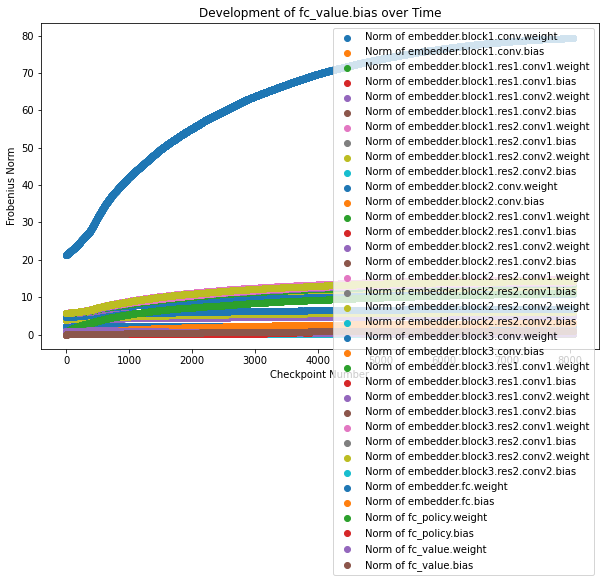

In [3]:
plt.figure(figsize=(10, 6))
for name in param_names:
    plt.scatter(range(len(param_norms[name])), param_norms[name], label=f'Norm of {name}')
plt.xlabel('Checkpoint Number')
plt.ylabel('Frobenius Norm')
plt.title(f'Development of {name} over Time')
plt.legend()
plt.show()
os.makedirs("plots/layer_frobenius_norms", exist_ok=True)
plt.savefig(f"plots/layer_frobenius_norms/frobenius_norm_of_{name}.png")
plt.close()

In [2]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.utils.extmath import randomized_svd

# Define the paths to your model checkpoints
checkpoint_paths = all_checkpoint_paths
checkpoint_paths = sorted(checkpoint_paths, key=extract_number)

# Number of highest singular values to consider
N = 5

# Storage for singular values of each parameter over time
singular_values_history = {name: [] for name in param_names}

for path in tqdm(checkpoint_paths):
    try:
        checkpoint = torch.load(path)
    except:
        print(f"Could not load {path}")
        continue
    for name in param_names:
        if 'bias' in name:
            continue
        # Extract parameter tensor
        param_tensor = checkpoint['state_dict'][name]
        
        # Flatten the tensor to 2D if not already
        if param_tensor.dim() > 2:
            param_tensor = param_tensor.view(param_tensor.size(0), -1)
        
        # Convert tensor to numpy for compatibility with scikit-learn
        param_tensor_np = param_tensor.cpu().numpy()
        
        # Perform randomized SVD
        _, s, _ = randomized_svd(param_tensor_np, n_components=N)
        
        # Store the N highest singular values
        singular_values_history[name].append(s)


NameError: name 'all_checkpoint_paths' is not defined

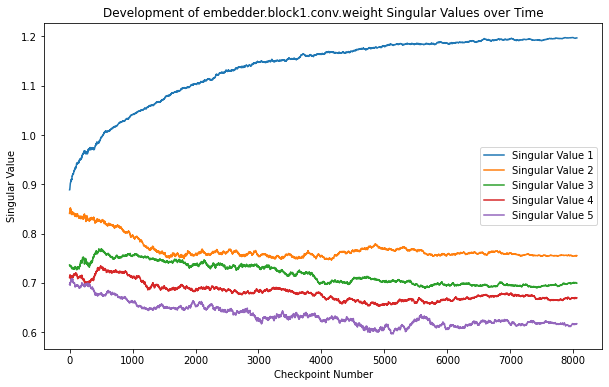

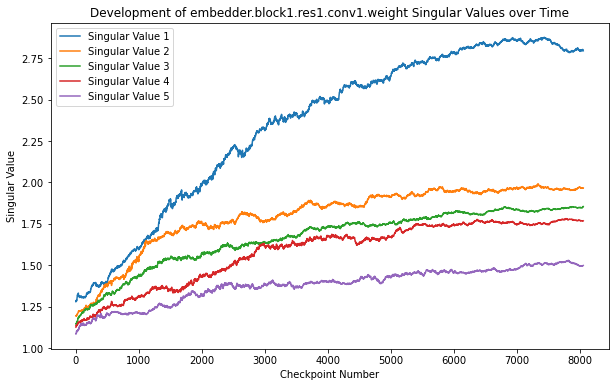

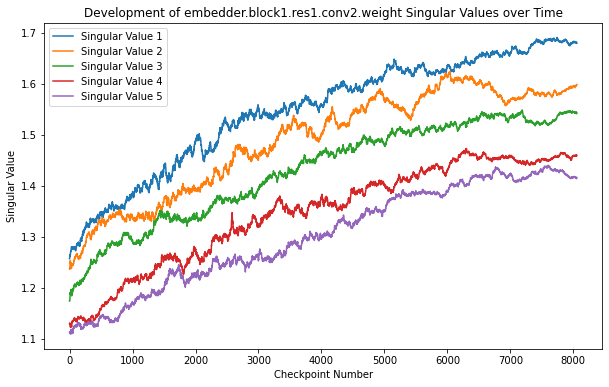

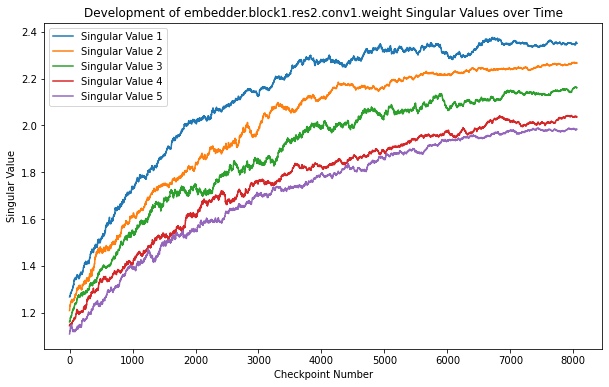

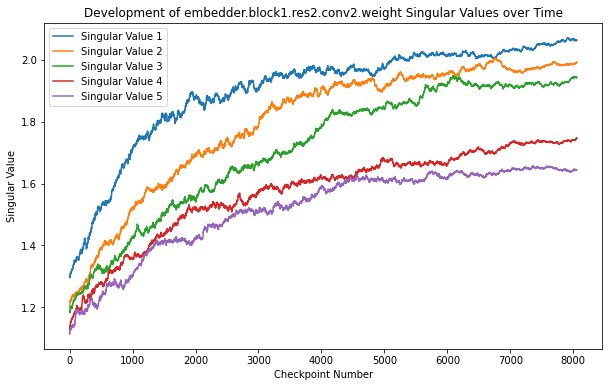

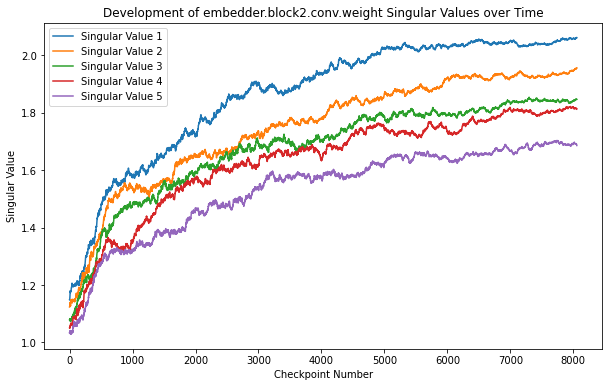

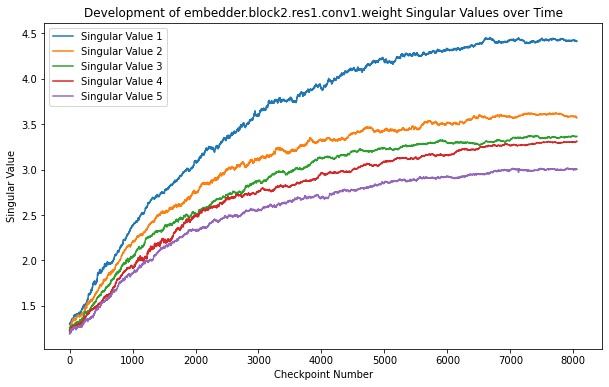

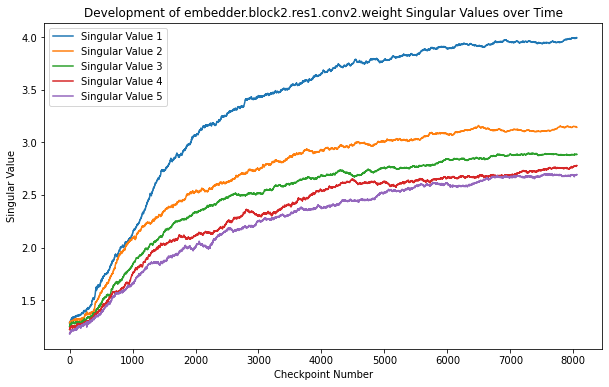

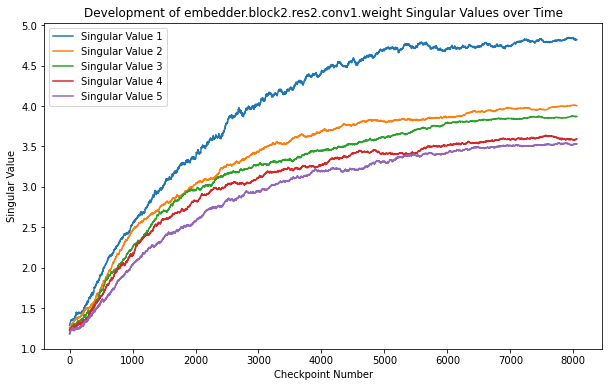

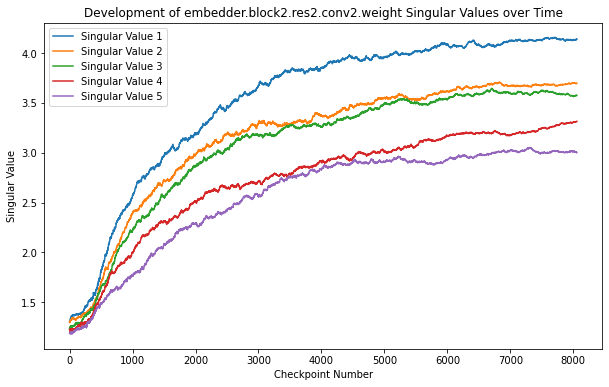

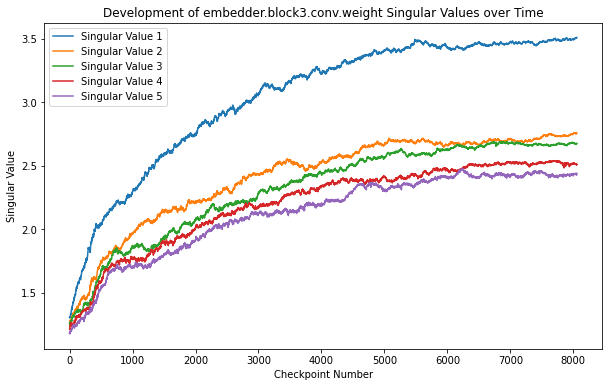

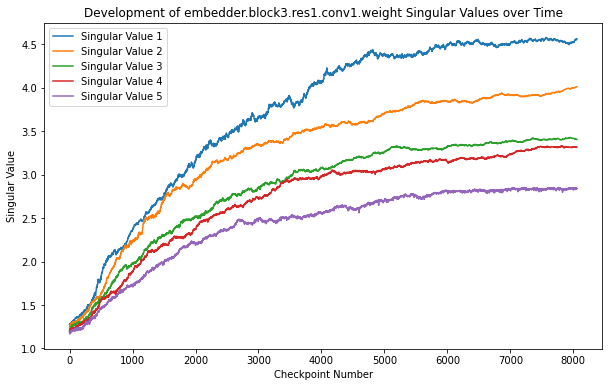

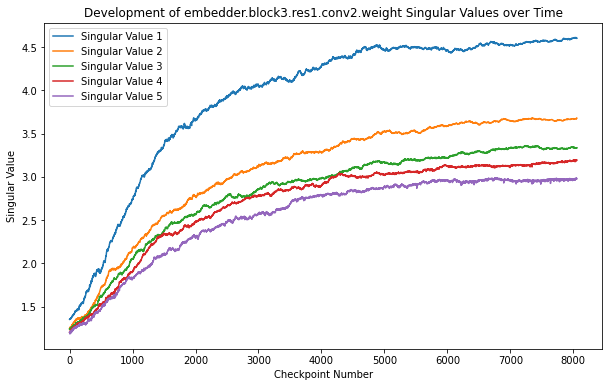

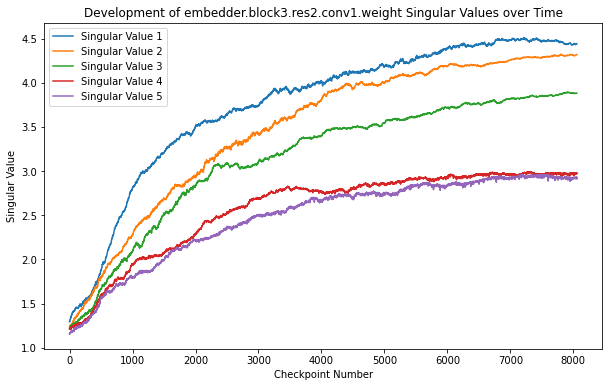

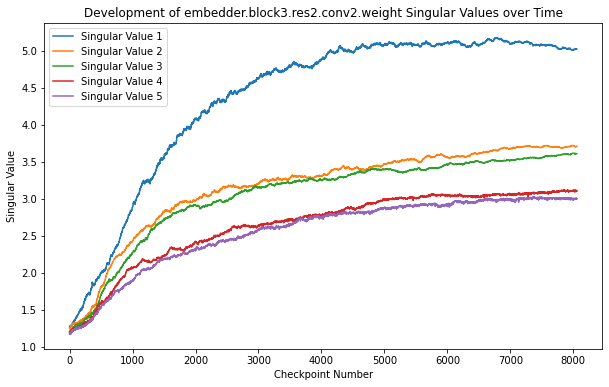

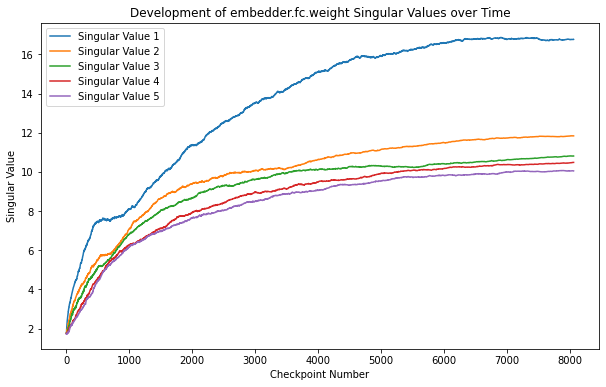

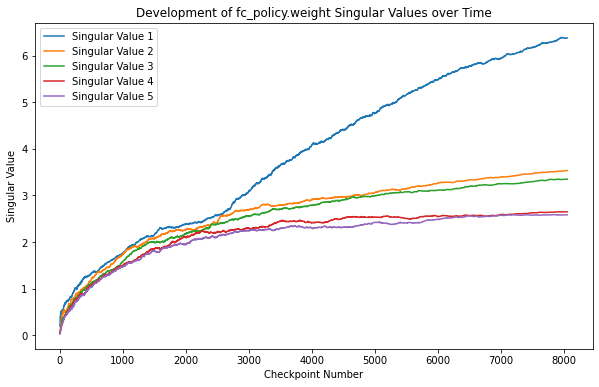

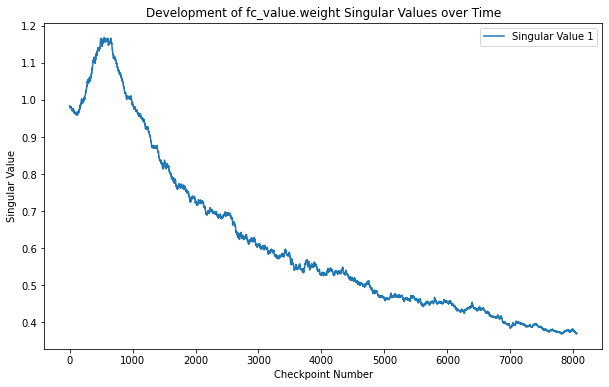

In [20]:
for i in param_names:
    if 'bias' in i:
        continue
    plt.figure(figsize=(10, 6))
    for j in range(min(N, np.array(singular_values_history[i]).shape[1])):
        plt.plot(np.array(singular_values_history[i])[:, j], label=f'Singular Value {j+1}')
    plt.xlabel('Checkpoint Number')
    plt.ylabel('Singular Value')
    plt.title(f'Development of {i} Singular Values over Time')
    plt.legend()
    plt.show()
    os.makedirs("plots/singular_values", exist_ok=True)
    plt.savefig(f"plots/singular_values/singular_values_of_{i}.png")
    plt.close()

 83%|████████▎ | 6700/8057 [06:18<00:24, 56.29it/s] 

Could not load models/model_133971968.pth/model_133971968.pth


100%|██████████| 8057/8057 [07:42<00:00, 17.41it/s]


(432, 8056)
(432, 8056)


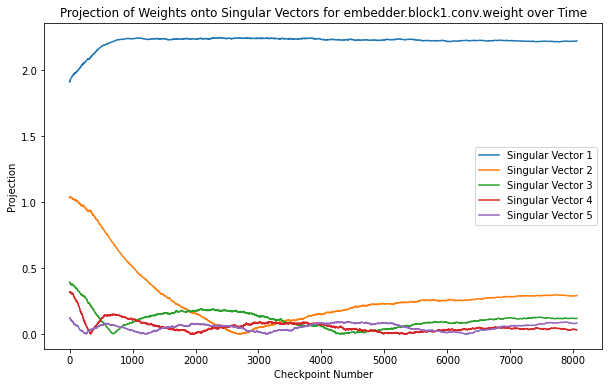

 83%|████████▎ | 6710/8057 [07:37<00:15, 87.65it/s] 

Could not load models/model_133971968.pth/model_133971968.pth


100%|██████████| 8057/8057 [09:11<00:00, 14.62it/s]


(16, 8056)
(16, 8056)


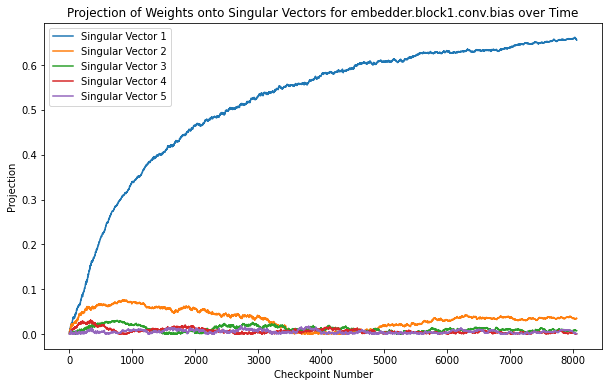

 83%|████████▎ | 6714/8057 [07:11<00:15, 87.67it/s] 

Could not load models/model_133971968.pth/model_133971968.pth


100%|██████████| 8057/8057 [09:11<00:00, 14.62it/s]


(2304, 8056)
(2304, 8056)


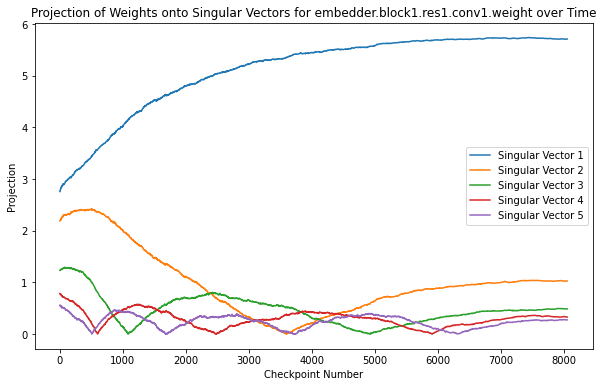

 83%|████████▎ | 6709/8057 [08:50<00:22, 58.72it/s]

Could not load models/model_133971968.pth/model_133971968.pth


100%|██████████| 8057/8057 [09:30<00:00, 14.12it/s] 


(16, 8056)
(16, 8056)


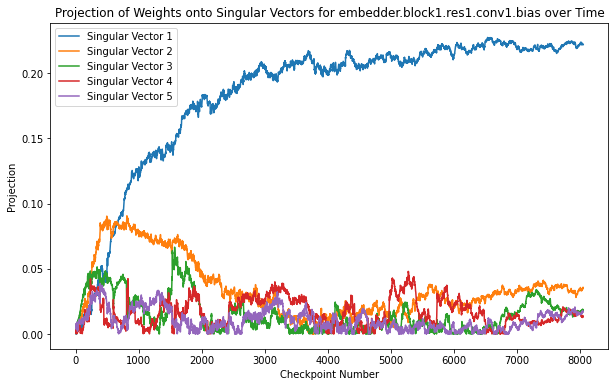

 83%|████████▎ | 6713/8057 [08:02<00:15, 86.63it/s] 

Could not load models/model_133971968.pth/model_133971968.pth


100%|██████████| 8057/8057 [08:29<00:00, 15.81it/s]


(2304, 8056)
(2304, 8056)


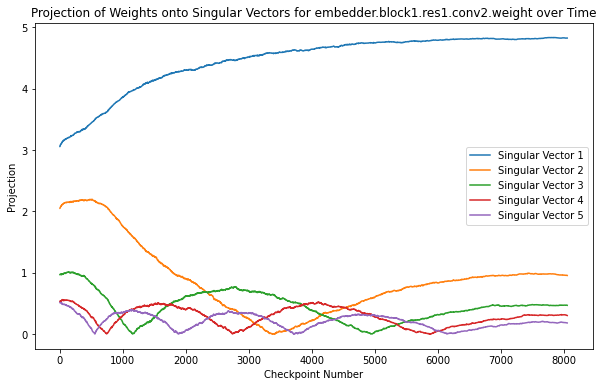

 83%|████████▎ | 6712/8057 [08:20<00:17, 75.44it/s]

Could not load models/model_133971968.pth/model_133971968.pth


100%|██████████| 8057/8057 [10:27<00:00, 12.84it/s]


(16, 8056)
(16, 8056)


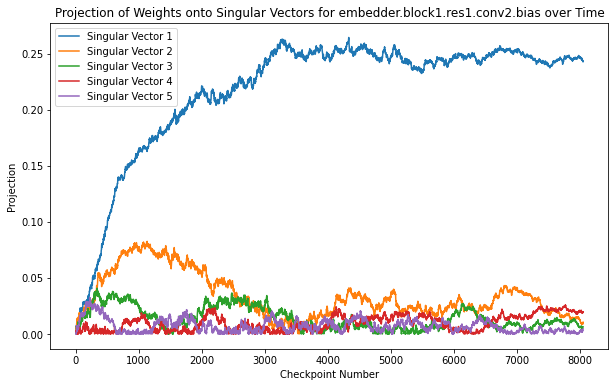

 83%|████████▎ | 6700/8057 [08:24<01:58, 11.47it/s]

Could not load models/model_133971968.pth/model_133971968.pth


100%|██████████| 8057/8057 [09:13<00:00, 14.55it/s]


(2304, 8056)
(2304, 8056)


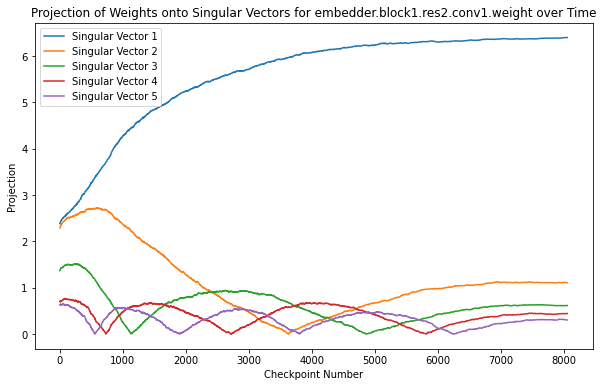

 83%|████████▎ | 6700/8057 [08:24<00:32, 42.04it/s]

Could not load models/model_133971968.pth/model_133971968.pth


100%|██████████| 8057/8057 [10:50<00:00, 12.38it/s]


(16, 8056)
(16, 8056)


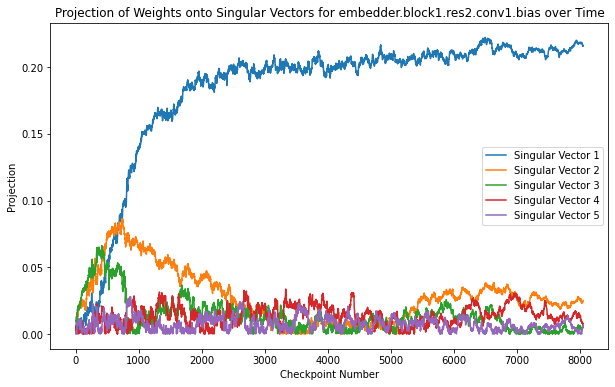

 83%|████████▎ | 6702/8057 [08:46<01:17, 17.44it/s] 

Could not load models/model_133971968.pth/model_133971968.pth


100%|██████████| 8057/8057 [10:44<00:00, 12.50it/s] 


(2304, 8056)
(2304, 8056)


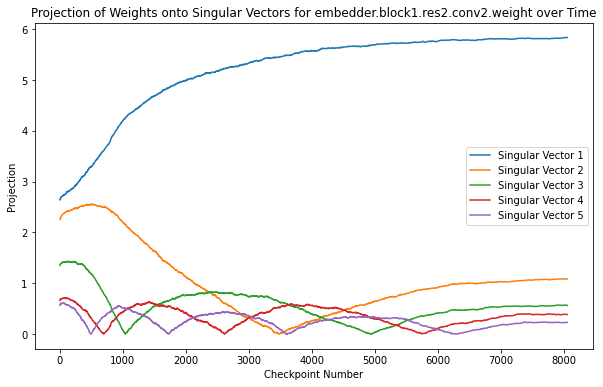

 83%|████████▎ | 6700/8057 [06:09<00:49, 27.19it/s] 

Could not load models/model_133971968.pth/model_133971968.pth


100%|██████████| 8057/8057 [08:32<00:00, 15.73it/s]


(16, 8056)
(16, 8056)


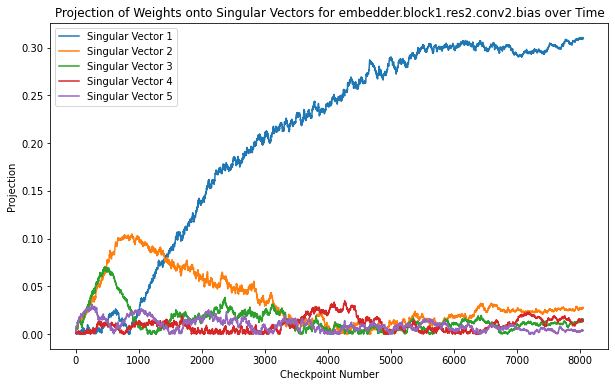

 32%|███▏      | 2540/8057 [03:21<10:11,  9.02it/s]

In [3]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils.extmath import randomized_svd
from tqdm import tqdm
checkpoint_paths = all_checkpoint_paths
# Assuming checkpoint_paths and param_name are defined
# param_name should be the name of the layer you're interested in
for param_name in param_names:
    # Collecting weights over time
    weights_over_time = []  # To store the weight matrices at each epoch
    for path in tqdm(checkpoint_paths):
        try:
            checkpoint = torch.load(path)
        except:
            print(f"Could not load {path}")
            continue
        weights = checkpoint['state_dict'][param_name].cpu().numpy()
        weights = weights.flatten()
        weights_over_time.append(weights)

    weights_over_time = np.array(weights_over_time).T
    print(weights_over_time.shape)
    u, s, vt = np.linalg.svd(weights_over_time, full_matrices=False)

    sv_components = u.T @ weights_over_time

    print(sv_components.shape)

    plt.figure(figsize=(10, 6))

    for i in range(5):
        plt.plot(np.abs(sv_components[i, :]), label=f'Singular Vector {i+1}')
    plt.xlabel('Checkpoint Number')
    plt.ylabel('Projection')
    plt.legend()
    plt.title(f'Projection of Weights onto Singular Vectors for {param_name} over Time')
    plt.show()
        # os.makedirs("plots/singular_vector_projections", exist_ok=True)
        # plt.savefig(f"plots/singular_vector_projections/singular_vector_{i+1}.png")
        # plt.close()